In [9]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage

import cmocean as cmocean

Populating the interactive namespace from numpy and matplotlib


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['square', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
#print geolon_t.shape

fh=fcor/ht
#print fh.shape

vgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

mom025_yu_ocean=yu_ocean
mom025_potrho=potrho

In [11]:
#load gmoc in rho space
#NYFCntrlDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
#NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp_ann/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'

#Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
#print Ocean_File
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print pert.ty_trans_rho.shape

vgrid_file ='/g/data/hh5/tmp/pas561/kds75_cp_ann/ocean_130.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean2 = nc.variables['yt_ocean'][:]
yu_ocean2 = nc.variables['yu_ocean'][:]
xt_ocean2 = nc.variables['xt_ocean'][:]
xu_ocean2 = nc.variables['xu_ocean'][:]
st_ocean2 = nc.variables['st_ocean'][:]
#potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho.shape
#print yu_ocean.shape


hgrid_file ='/g/data/hh5/tmp/pas561/mom01_unmasked_ocean_grid.nc'
# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t2 = nc.variables['geolon_t'][:]
geolat_t2 = nc.variables['geolat_t'][:]
nc.close() # close the file

#of=os.path.join(NYFCntrlDir,'psi_ann.npy')
#cntrl_psi=np.load(of)
#print(cntrl_psi.shape)

#of=os.path.join(NYFPertDir,'psi_ann.npy')
#pert_psi=np.load(of)
#print(pert_psi.shape)



In [12]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFCntrlDir,'cT_0to1.npy')
np_cT_0to1=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_1to4.npy')
np_cT_1to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_2to4.npy')
np_cT_2to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_4to6.npy')
np_cT_4to6=np.load(of)  

print(np_cT_0to1.shape)
print(np_cT_1to4.shape)
print(np_cT_4to6.shape)

of=os.path.join(NYFPertDir,'pT_0to1.npy')
np_pT_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pT_1to4.npy')
np_pT_1to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_2to4.npy')
np_pT_2to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_4to6.npy')
np_pT_4to6=np.load(of)  

print(np_pT_0to1.shape)
print(np_pT_1to4.shape)
print(np_pT_4to6.shape)


(49, 1080, 1440)
(49, 1080, 1440)
(49, 1080, 1440)
(44, 1080, 1440)
(44, 1080, 1440)
(44, 1080, 1440)


In [13]:
#calc dT/dt
cyrs=np.arange(1971,2017,1)
pyrs=np.arange(1973,2017,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
print(cyrs[10:30])
print(pyrs[8:28])

print(cyrs[30:46])
print(pyrs[28:44])


np_tr73to80_pT_0to1=np.zeros((500,1440))
np_tr73to80_cT_0to1=np.zeros((500,1440))
np_tr73to80_pT_1to4=np.zeros((500,1440))
np_tr73to80_cT_1to4=np.zeros((500,1440))
np_tr73to80_pT_4to6=np.zeros((500,1440))
np_tr73to80_cT_4to6=np.zeros((500,1440))

np_tr81to90_pT_0to1=np.zeros((500,1440))
np_tr81to90_cT_0to1=np.zeros((500,1440))
np_tr81to90_pT_1to4=np.zeros((500,1440))
np_tr81to90_cT_1to4=np.zeros((500,1440))
np_tr81to90_pT_4to6=np.zeros((500,1440))
np_tr81to90_cT_4to6=np.zeros((500,1440))

np_tr91to00_pT_0to1=np.zeros((500,1440))
np_tr91to00_cT_0to1=np.zeros((500,1440))
np_tr91to00_pT_1to4=np.zeros((500,1440))
np_tr91to00_cT_1to4=np.zeros((500,1440))
np_tr91to00_pT_4to6=np.zeros((500,1440))
np_tr91to00_cT_4to6=np.zeros((500,1440))

np_tr81to00_pT_0to1=np.zeros((500,1440))
np_tr81to00_cT_0to1=np.zeros((500,1440))
np_tr81to00_pT_1to4=np.zeros((500,1440))
np_tr81to00_cT_1to4=np.zeros((500,1440))
np_tr81to00_pT_4to6=np.zeros((500,1440))
np_tr81to00_cT_4to6=np.zeros((500,1440))

np_tr00to17_pT_0to1=np.zeros((500,1440))
np_tr00to17_cT_0to1=np.zeros((500,1440))
np_tr00to17_pT_1to4=np.zeros((500,1440))
np_tr00to17_cT_1to4=np.zeros((500,1440))
np_tr00to17_pT_4to6=np.zeros((500,1440))
np_tr00to17_cT_4to6=np.zeros((500,1440))

np_tr81to17_pT_0to1=np.zeros((500,1440))
np_tr81to17_cT_0to1=np.zeros((500,1440))
np_tr81to17_pT_1to4=np.zeros((500,1440))
np_tr81to17_cT_1to4=np.zeros((500,1440))
np_tr81to17_pT_4to6=np.zeros((500,1440))
np_tr81to17_cT_4to6=np.zeros((500,1440))


for j in range(0,500):
    #print j
    
    #0-1km depg
    np_tr73to80_pT_0to1[j,:]=np.polyfit(range(8), np_pT_0to1[0:8,j,:],1)[0,:]
    np_tr73to80_cT_0to1[j,:]=np.polyfit(range(8), np_cT_0to1[2:10,j,:],1)[0,:]

    np_tr81to90_pT_0to1[j,:]=np.polyfit(range(10), np_pT_0to1[8:18,j,:],1)[0,:]
    np_tr81to90_cT_0to1[j,:]=np.polyfit(range(10), np_cT_0to1[10:20,j,:],1)[0,:]

    np_tr91to00_pT_0to1[j,:]=np.polyfit(range(10), np_pT_0to1[18:28,j,:],1)[0,:]
    np_tr91to00_cT_0to1[j,:]=np.polyfit(range(10), np_cT_0to1[20:30,j,:],1)[0,:]
    
    np_tr81to00_pT_0to1[j,:]=np.polyfit(range(20), np_pT_0to1[8:28,j,:],1)[0,:]
    np_tr81to00_cT_0to1[j,:]=np.polyfit(range(20), np_cT_0to1[10:30,j,:],1)[0,:]
    
    np_tr00to17_pT_0to1[j,:]=np.polyfit(range(16), np_pT_0to1[28:44,j,:],1)[0,:]
    np_tr00to17_cT_0to1[j,:]=np.polyfit(range(16), np_cT_0to1[30:46,j,:],1)[0,:]
    
    np_tr81to17_pT_0to1[j,:]=np.polyfit(range(36), np_pT_0to1[8:44,j,:],1)[0,:]
    np_tr81to17_cT_0to1[j,:]=np.polyfit(range(36), np_cT_0to1[10:46,j,:],1)[0,:]
    
    
    #1-4km depg
    np_tr73to80_pT_1to4[j,:]=np.polyfit(range(8), np_pT_1to4[0:8,j,:],1)[0,:]
    np_tr73to80_cT_1to4[j,:]=np.polyfit(range(8), np_cT_1to4[2:10,j,:],1)[0,:]

    np_tr81to90_pT_1to4[j,:]=np.polyfit(range(10), np_pT_1to4[8:18,j,:],1)[0,:]
    np_tr81to90_cT_1to4[j,:]=np.polyfit(range(10), np_cT_1to4[10:20,j,:],1)[0,:]

    np_tr91to00_pT_1to4[j,:]=np.polyfit(range(10), np_pT_1to4[18:28,j,:],1)[0,:]
    np_tr91to00_cT_1to4[j,:]=np.polyfit(range(10), np_cT_1to4[20:30,j,:],1)[0,:]
    
    np_tr81to00_pT_1to4[j,:]=np.polyfit(range(20), np_pT_1to4[8:28,j,:],1)[0,:]
    np_tr81to00_cT_1to4[j,:]=np.polyfit(range(20), np_cT_1to4[10:30,j,:],1)[0,:]
    
    np_tr00to17_pT_1to4[j,:]=np.polyfit(range(16), np_pT_1to4[28:44,j,:],1)[0,:]
    np_tr00to17_cT_1to4[j,:]=np.polyfit(range(16), np_cT_1to4[30:46,j,:],1)[0,:]
    
    np_tr81to17_pT_1to4[j,:]=np.polyfit(range(36), np_pT_1to4[8:44,j,:],1)[0,:]
    np_tr81to17_cT_1to4[j,:]=np.polyfit(range(36), np_cT_1to4[10:46,j,:],1)[0,:]

    
    #1-4km depg
    np_tr73to80_pT_4to6[j,:]=np.polyfit(range(8), np_pT_4to6[0:8,j,:],1)[0,:]
    np_tr73to80_cT_4to6[j,:]=np.polyfit(range(8), np_cT_4to6[2:10,j,:],1)[0,:]

    np_tr81to90_pT_4to6[j,:]=np.polyfit(range(10), np_pT_4to6[8:18,j,:],1)[0,:]
    np_tr81to90_cT_4to6[j,:]=np.polyfit(range(10), np_cT_4to6[10:20,j,:],1)[0,:]

    np_tr91to00_pT_4to6[j,:]=np.polyfit(range(10), np_pT_4to6[18:28,j,:],1)[0,:]
    np_tr91to00_cT_4to6[j,:]=np.polyfit(range(10), np_cT_4to6[20:30,j,:],1)[0,:]
    
    np_tr81to00_pT_4to6[j,:]=np.polyfit(range(20), np_pT_4to6[8:28,j,:],1)[0,:]
    np_tr81to00_cT_4to6[j,:]=np.polyfit(range(20), np_cT_4to6[10:30,j,:],1)[0,:]    
    
    np_tr00to17_pT_4to6[j,:]=np.polyfit(range(16), np_pT_4to6[28:44,j,:],1)[0,:]
    np_tr00to17_cT_4to6[j,:]=np.polyfit(range(16), np_cT_4to6[30:46,j,:],1)[0,:]

    np_tr81to17_pT_4to6[j,:]=np.polyfit(range(36), np_pT_4to6[8:44,j,:],1)[0,:]
    np_tr81to17_cT_4to6[j,:]=np.polyfit(range(36), np_cT_4to6[10:46,j,:],1)[0,:]

    

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


In [14]:
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp_ann/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'

Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
print(Ocean_File)
mom01_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(mom01_cntrl.temp.shape)

Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
print(Ocean_File)
mom01_pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(mom01_pert.temp.shape)

/g/data/hh5/tmp/pas561/kds75_cp_ann/ocean_*.nc
(27, 75, 1351, 3600)
/g/data/hh5/tmp/pas561/kds75_wp2/2yr/ocean_*.nc
(27, 75, 1351, 3600)


In [15]:
of=os.path.join(NYFCntrlDir,'cT_0to1.npy')
mom01_cT_0to1=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_1to4.npy')
mom01_cT_1to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_4to6.npy')
mom01_cT_4to6=np.load(of)  

print(mom01_cT_1to4.shape)
print(mom01_cT_4to6.shape)

of=os.path.join(NYFPertDir,'pT_0to1.npy')
mom01_pT_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pT_1to4.npy')
mom01_pT_1to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_4to6.npy')
mom01_pT_4to6=np.load(of)  

print(mom01_pT_1to4.shape)
print(mom01_pT_4to6.shape)


(27, 1351, 3600)
(27, 1351, 3600)
(29, 1351, 3600)
(29, 1351, 3600)


In [16]:
#calc dT/dt
#cyrs=np.arange(1970,2017,1)
pyrs=np.arange(1973,1973+27,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
print(pyrs)
print(pyrs[8:28])
print(pyrs[28:44])

[1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999]
[]


In [17]:
#calc dT/dt
#cyrs=np.arange(1970,2017,1)
pyrs=np.arange(1973,1973+27,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
#print cyrs[11:31]
print(pyrs[8:28])

wp_os=3

mom01_tr73to80_pT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr73to80_cT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr73to80_pT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr73to80_cT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr73to80_pT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr73to80_cT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))

mom01_tr81to90_pT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to90_cT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to90_pT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to90_cT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to90_pT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to90_cT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))

mom01_tr91to00_pT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr91to00_cT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr91to00_pT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr91to00_cT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr91to00_pT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr91to00_cT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))

mom01_tr81to00_pT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_cT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_pT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_cT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_pT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_cT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))



for j in range(0,mom01_cntrl.temp.shape[2]):
    #print j
    
    mom01_tr73to80_pT_0to1[j,:]=np.polyfit(range(8), mom01_pT_0to1[0:8,j,:],1)[0,:]
    mom01_tr73to80_cT_0to1[j,:]=np.polyfit(range(8), mom01_cT_0to1[0:8,j,:],1)[0,:]
    mom01_tr81to90_pT_0to1[j,:]=np.polyfit(range(10), mom01_pT_0to1[8:18,j,:],1)[0,:]
    mom01_tr81to90_cT_0to1[j,:]=np.polyfit(range(10), mom01_cT_0to1[8:18,j,:],1)[0,:]
    mom01_tr91to00_pT_0to1[j,:]=np.polyfit(range(9), mom01_pT_0to1[18:27,j,:],1)[0,:]
    mom01_tr91to00_cT_0to1[j,:]=np.polyfit(range(9), mom01_cT_0to1[18:27,j,:],1)[0,:]
    mom01_tr81to00_pT_0to1[j,:]=np.polyfit(range(19), mom01_pT_0to1[8:27,j,:],1)[0,:]
    mom01_tr81to00_cT_0to1[j,:]=np.polyfit(range(19), mom01_cT_0to1[8:27,j,:],1)[0,:]
     
    mom01_tr73to80_pT_1to4[j,:]=np.polyfit(range(8), mom01_pT_1to4[0:8,j,:],1)[0,:]
    mom01_tr73to80_cT_1to4[j,:]=np.polyfit(range(8), mom01_cT_1to4[0:8,j,:],1)[0,:]
    mom01_tr81to90_pT_1to4[j,:]=np.polyfit(range(10), mom01_pT_1to4[8:18,j,:],1)[0,:]
    mom01_tr81to90_cT_1to4[j,:]=np.polyfit(range(10), mom01_cT_1to4[8:18,j,:],1)[0,:]
    mom01_tr91to00_pT_1to4[j,:]=np.polyfit(range(9), mom01_pT_1to4[18:27,j,:],1)[0,:]
    mom01_tr91to00_cT_1to4[j,:]=np.polyfit(range(9), mom01_cT_1to4[18:27,j,:],1)[0,:]
    mom01_tr81to00_pT_1to4[j,:]=np.polyfit(range(19), mom01_pT_1to4[8:27,j,:],1)[0,:]
    mom01_tr81to00_cT_1to4[j,:]=np.polyfit(range(19), mom01_cT_1to4[8:27,j,:],1)[0,:]
    
    mom01_tr73to80_pT_4to6[j,:]=np.polyfit(range(8), mom01_pT_4to6[0:8,j,:],1)[0,:]
    mom01_tr73to80_cT_4to6[j,:]=np.polyfit(range(8), mom01_cT_4to6[0:8,j,:],1)[0,:]
    mom01_tr81to90_pT_4to6[j,:]=np.polyfit(range(10), mom01_pT_4to6[8:18,j,:],1)[0,:]
    mom01_tr81to90_cT_4to6[j,:]=np.polyfit(range(10), mom01_cT_4to6[8:18,j,:],1)[0,:]
    mom01_tr91to00_pT_4to6[j,:]=np.polyfit(range(9), mom01_pT_4to6[18:27,j,:],1)[0,:]
    mom01_tr91to00_cT_4to6[j,:]=np.polyfit(range(9), mom01_cT_4to6[18:27,j,:],1)[0,:]
    mom01_tr81to00_pT_4to6[j,:]=np.polyfit(range(19), mom01_pT_4to6[8:27,j,:],1)[0,:]
    mom01_tr81to00_cT_4to6[j,:]=np.polyfit(range(19), mom01_cT_4to6[8:27,j,:],1)[0,:]    
    

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999]


In [18]:
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/'

of=os.path.join(NYFCntrlDir,'cT_0to1_141to155.npy')
mom01_cT_0to1=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_1to4_141to155.npy')
mom01_cT_1to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_4to6_141to155.npy')
mom01_cT_4to6=np.load(of)  

print(mom01_cT_1to4.shape)
print(mom01_cT_4to6.shape)



of=os.path.join(NYFPertDir,'pT_0to1_141to154.npy')
mom01_pT_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pT_1to4_141to154.npy')
mom01_pT_1to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_4to6_141to154.npy')
mom01_pT_4to6=np.load(of)  

print(mom01_pT_1to4.shape)
print(mom01_pT_4to6.shape)


(15, 1351, 3600)
(15, 1351, 3600)
(14, 1351, 3600)
(14, 1351, 3600)


In [19]:
mom01_tr01to15_pT_0to1=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr01to15_cT_0to1=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr01to15_pT_1to4=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr01to15_cT_1to4=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr01to15_pT_4to6=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr01to15_cT_4to6=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))


for j in range(0,mom01_pT_1to4.shape[1]):
    #print j
    
    mom01_tr01to15_pT_0to1[j,:]=np.polyfit(range(14), mom01_pT_0to1[0:14,j,:],1)[0,:]
    mom01_tr01to15_cT_0to1[j,:]=np.polyfit(range(14), mom01_cT_0to1[0:14,j,:],1)[0,:]
     
    mom01_tr01to15_pT_1to4[j,:]=np.polyfit(range(14), mom01_pT_1to4[0:14,j,:],1)[0,:]
    mom01_tr01to15_cT_1to4[j,:]=np.polyfit(range(14), mom01_cT_1to4[0:14,j,:],1)[0,:]
    
    mom01_tr01to15_pT_4to6[j,:]=np.polyfit(range(14), mom01_pT_4to6[0:14,j,:],1)[0,:]
    mom01_tr01to15_cT_4to6[j,:]=np.polyfit(range(14), mom01_cT_4to6[0:14,j,:],1)[0,:]    
    

In [20]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap


In [21]:
#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .051/(.051 + .01)
#print(mp)
#print(st_ocean[-1:])
#print(st_ocean2[-1:])

mp=1 - .35/(.35 + .15)
print(mp)
orig_cmap = matplotlib.cm.bwr#coolwarm
shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
print(orig_cmap)
print(shifted_cmap)

0.3


[-5.0000000e-02 -4.0000000e-02 -3.0000000e-02 -2.0000000e-02
 -1.0000000e-02  6.9388939e-18  1.0000000e-02  2.0000000e-02
  3.0000000e-02  4.0000000e-02  5.0000000e-02  6.0000000e-02
  7.0000000e-02  8.0000000e-02  9.0000000e-02  1.0000000e-01]
0.3125
[-5.0000000e-02 -4.0000000e-02 -3.0000000e-02 -2.0000000e-02
 -1.0000000e-02  6.9388939e-18  1.0000000e-02  2.0000000e-02
  3.0000000e-02  4.0000000e-02  5.0000000e-02  6.0000000e-02
  7.0000000e-02  8.0000000e-02  9.0000000e-02  1.0000000e-01]
0.3125


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


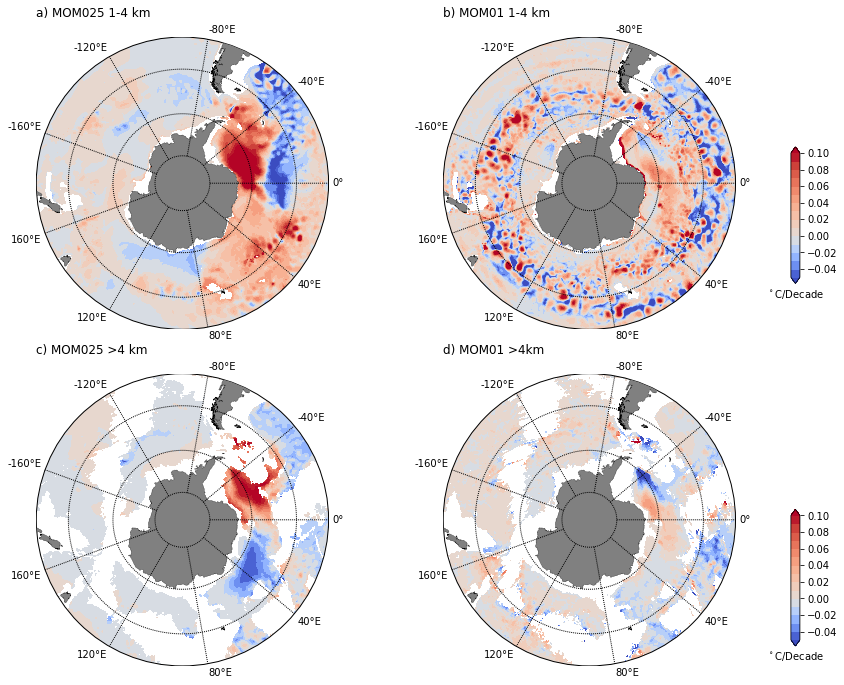

In [22]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.05,.11,.01)
print(clev)
#midpoint his should be  1 - vmax / (vmax + abs(vmin))
mp=1 - .11/(.11 + .05)

print(mp)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
#shifted_cmap= matplotlib.cm.coolwarm

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_1to4*10-np_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('a) MOM025 1-4 km ',pad=20,loc='left')


plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_1to4*10-mom01_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('b) MOM01 1-4 km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.58,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')

#clev = np.arange(-.1,.11,.01)
clev = np.arange(-.05,.11,.01)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
mp=1 - .11/(.11 + .05)
print(mp)
orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
#shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_4to6*10-np_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('c) MOM025 >4 km ',pad=20,loc='left')

plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_4to6*10-mom01_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('d) MOM01 >4km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.05,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')


plt.tight_layout()

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig_TTrend.png'
#plt.savefig(of,dpi=220)

In [23]:
cmocean.cm.balance

[-5.0000000e-02 -4.0000000e-02 -3.0000000e-02 -2.0000000e-02
 -1.0000000e-02  6.9388939e-18  1.0000000e-02  2.0000000e-02
  3.0000000e-02  4.0000000e-02  5.0000000e-02  6.0000000e-02
  7.0000000e-02  8.0000000e-02  9.0000000e-02  1.0000000e-01
  1.1000000e-01  1.2000000e-01  1.3000000e-01  1.4000000e-01
  1.5000000e-01]
0.238095238095


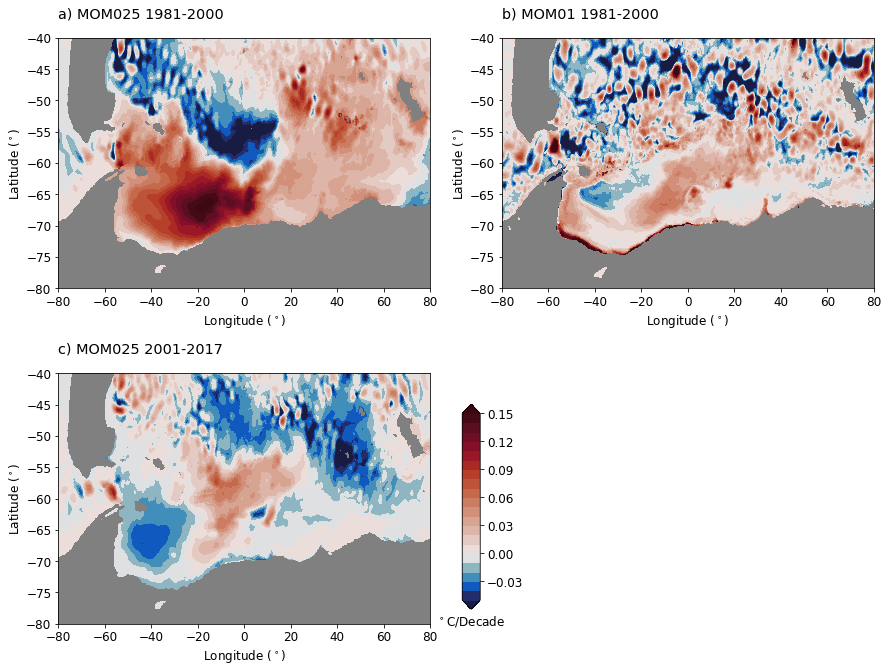

In [24]:
#plot dT/dt K/yr heating trend
#plot with distance along contour as x-axis
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.05,.16,.01)
print(clev)
#midpoint his should be  1 - vmax / (vmax + abs(vmin))
mp=1 - .16/(.16 + .05)

print(mp)
orig_cmap = cmocean.cm.balance
shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
#shifted_cmap= matplotlib.cm.coolwarm

plt.subplot(2,2,1)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr81to00_pT_1to4*10-np_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-40))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) MOM025 1981-2000',pad=20,loc='left')


plt.subplot(2,2,2)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr81to00_pT_1to4*10-mom01_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-40))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('b) MOM01 1981-2000',pad=20,loc='left')

plt.subplot(2,2,3)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr00to17_pT_1to4*10-np_tr00to17_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-40))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('c) MOM025 2001-2017',pad=20,loc='left')

ax3 = plt.axes([0.52,0.10,0.02,0.3])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_TTrend_1to4.png'
plt.savefig(of,dpi=220,bbox_inches='tight')

[-5.00000000e-01 -4.50000000e-01 -4.00000000e-01 -3.50000000e-01
 -3.00000000e-01 -2.50000000e-01 -2.00000000e-01 -1.50000000e-01
 -1.00000000e-01 -5.00000000e-02 -1.11022302e-16  5.00000000e-02
  1.00000000e-01  1.50000000e-01  2.00000000e-01  2.50000000e-01
  3.00000000e-01  3.50000000e-01  4.00000000e-01  4.50000000e-01
  5.00000000e-01]
[-2.00000000e-01 -1.80000000e-01 -1.60000000e-01 -1.40000000e-01
 -1.20000000e-01 -1.00000000e-01 -8.00000000e-02 -6.00000000e-02
 -4.00000000e-02 -2.00000000e-02 -1.11022302e-16  2.00000000e-02
  4.00000000e-02  6.00000000e-02  8.00000000e-02  1.00000000e-01
  1.20000000e-01  1.40000000e-01  1.60000000e-01  1.80000000e-01
  2.00000000e-01]


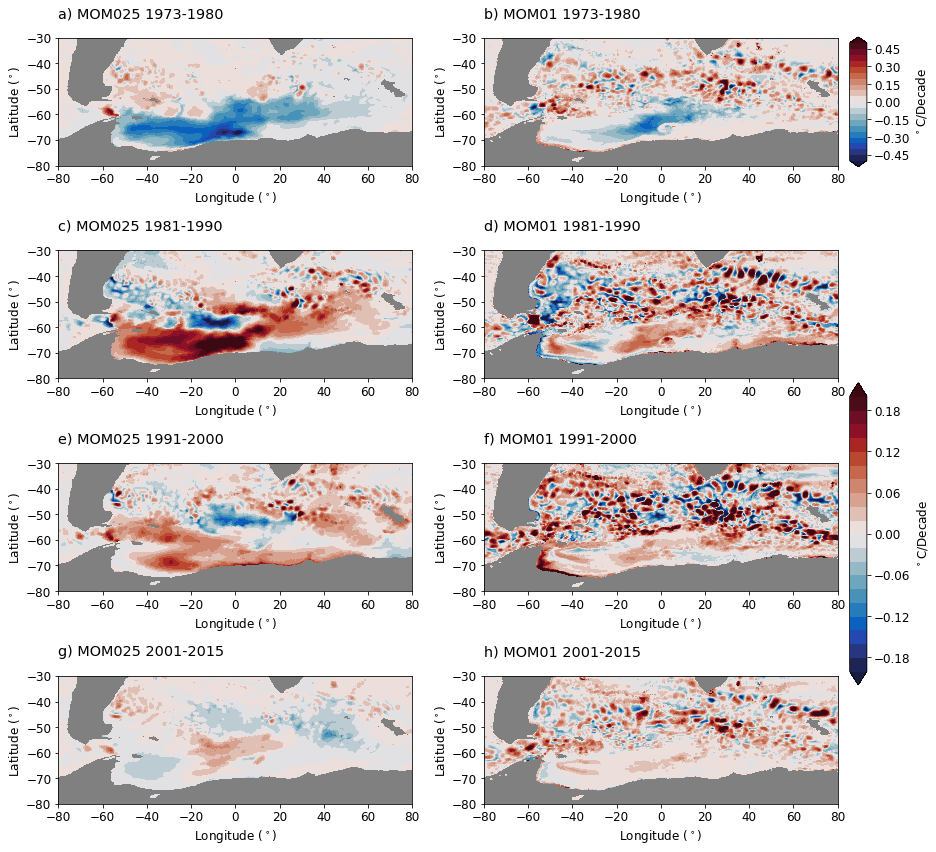

In [26]:
#plot dT/dt K/yr heating trend
#plot with distance along contour as x-axis
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.5,.55,.05)
print(clev)

plt.subplot(4,2,1)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr73to80_pT_1to4*10-np_tr73to80_cT_1to4*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) MOM025 1973-1980',pad=20,loc='left')

plt.subplot(4,2,2)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr73to80_pT_1to4*10-mom01_tr73to80_cT_1to4*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('b) MOM01 1973-1980',pad=20,loc='left')

ax3 = plt.axes([0.99,0.80,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$^\circ$C/Decade')


clev = np.arange(-.2,.22,.02)
print(clev)


plt.subplot(4,2,3)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr81to90_pT_1to4*10-np_tr81to90_cT_1to4*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('c) MOM025 1981-1990',pad=20,loc='left')

plt.subplot(4,2,4)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr81to90_pT_1to4*10-mom01_tr81to90_cT_1to4*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('d) MOM01 1981-1990',pad=20,loc='left')

plt.subplot(4,2,5)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr91to00_pT_1to4*10-np_tr91to00_cT_1to4*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('e) MOM025 1991-2000',pad=20,loc='left')

plt.subplot(4,2,6)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr91to00_pT_1to4*10-mom01_tr91to00_cT_1to4*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('f) MOM01 1991-2000',pad=20,loc='left')

plt.subplot(4,2,7)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr00to17_pT_1to4*10-np_tr00to17_cT_1to4*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('g) MOM025 2001-2015',pad=20,loc='left')

plt.subplot(4,2,8)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr01to15_pT_1to4*10-mom01_tr01to15_cT_1to4*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('h) MOM01 2001-2015',pad=20,loc='left')

ax3 = plt.axes([0.99,0.20,0.02,0.35])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$^\circ$C/Decade')
#ax3 = plt.axes([0.6,0.10,0.35,0.02])
#cb = plt.colorbar(p1,cax=ax3,orientation='horizontal',shrink = 0.5)
#cb.ax.set_xlabel('$^\circ$C/Decade')

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_TTrend_1to4.png'
plt.savefig(of,dpi=220,bbox_inches='tight')

[-5.00000000e-01 -4.50000000e-01 -4.00000000e-01 -3.50000000e-01
 -3.00000000e-01 -2.50000000e-01 -2.00000000e-01 -1.50000000e-01
 -1.00000000e-01 -5.00000000e-02 -1.11022302e-16  5.00000000e-02
  1.00000000e-01  1.50000000e-01  2.00000000e-01  2.50000000e-01
  3.00000000e-01  3.50000000e-01  4.00000000e-01  4.50000000e-01
  5.00000000e-01]
[-2.00000000e-01 -1.80000000e-01 -1.60000000e-01 -1.40000000e-01
 -1.20000000e-01 -1.00000000e-01 -8.00000000e-02 -6.00000000e-02
 -4.00000000e-02 -2.00000000e-02 -1.11022302e-16  2.00000000e-02
  4.00000000e-02  6.00000000e-02  8.00000000e-02  1.00000000e-01
  1.20000000e-01  1.40000000e-01  1.60000000e-01  1.80000000e-01
  2.00000000e-01]


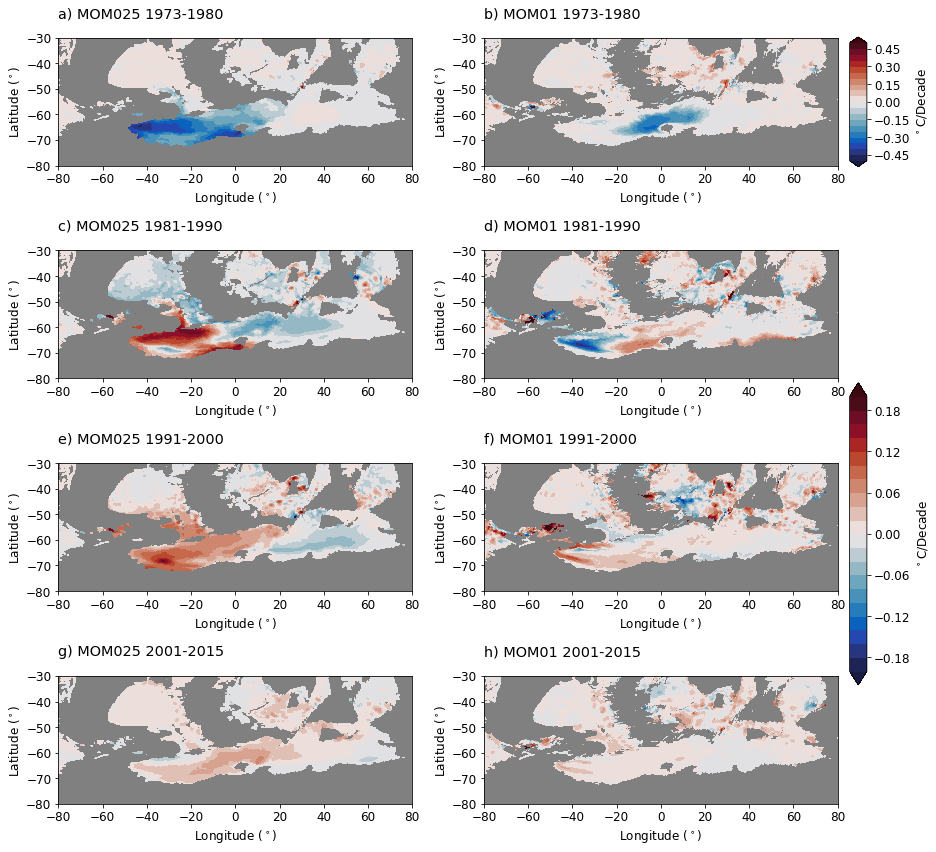

In [27]:
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.5,.55,.05)
print(clev)

plt.subplot(4,2,1)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr73to80_pT_4to6*10-np_tr73to80_cT_4to6*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) MOM025 1973-1980',pad=20,loc='left')

plt.subplot(4,2,2)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr73to80_pT_4to6*10-mom01_tr73to80_cT_4to6*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('b) MOM01 1973-1980',pad=20,loc='left')

ax3 = plt.axes([0.99,0.80,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$^\circ$C/Decade')


clev = np.arange(-.2,.22,.02)
print(clev)

plt.subplot(4,2,3)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr81to90_pT_4to6*10-np_tr81to90_cT_4to6*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('c) MOM025 1981-1990',pad=20,loc='left')

plt.subplot(4,2,4)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr81to90_pT_4to6*10-mom01_tr81to90_cT_4to6*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('d) MOM01 1981-1990',pad=20,loc='left')

plt.subplot(4,2,5)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr91to00_pT_4to6*10-np_tr91to00_cT_4to6*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('e) MOM025 1991-2000',pad=20,loc='left')

plt.subplot(4,2,6)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr91to00_pT_4to6*10-mom01_tr91to00_cT_4to6*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('f) MOM01 1991-2000',pad=20,loc='left')

plt.subplot(4,2,7)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np_tr00to17_pT_4to6*10-np_tr00to17_cT_4to6*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('g) MOM025 2001-2015',pad=20,loc='left')

plt.subplot(4,2,8)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t2[0:1351,:],geolat_t2[0:1351,:],mom01_tr01to15_pT_4to6*10-mom01_tr01to15_cT_4to6*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('h) MOM01 2001-2015',pad=20,loc='left')

ax3 = plt.axes([0.99,0.20,0.02,0.35])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$^\circ$C/Decade')

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_TTrend_gt4.png'
plt.savefig(of,dpi=220,bbox_inches='tight')

[-2.00000000e-01 -1.50000000e-01 -1.00000000e-01 -5.00000000e-02
 -5.55111512e-17  5.00000000e-02  1.00000000e-01  1.50000000e-01
  2.00000000e-01]
[-1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02 -5.55111512e-17  1.00000000e-02
  2.00000000e-02  3.00000000e-02  4.00000000e-02  5.00000000e-02
  6.00000000e-02  7.00000000e-02  8.00000000e-02  9.00000000e-02
  1.00000000e-01]
[-1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02 -5.55111512e-17  1.00000000e-02
  2.00000000e-02  3.00000000e-02  4.00000000e-02  5.00000000e-02
  6.00000000e-02  7.00000000e-02  8.00000000e-02  9.00000000e-02
  1.00000000e-01]


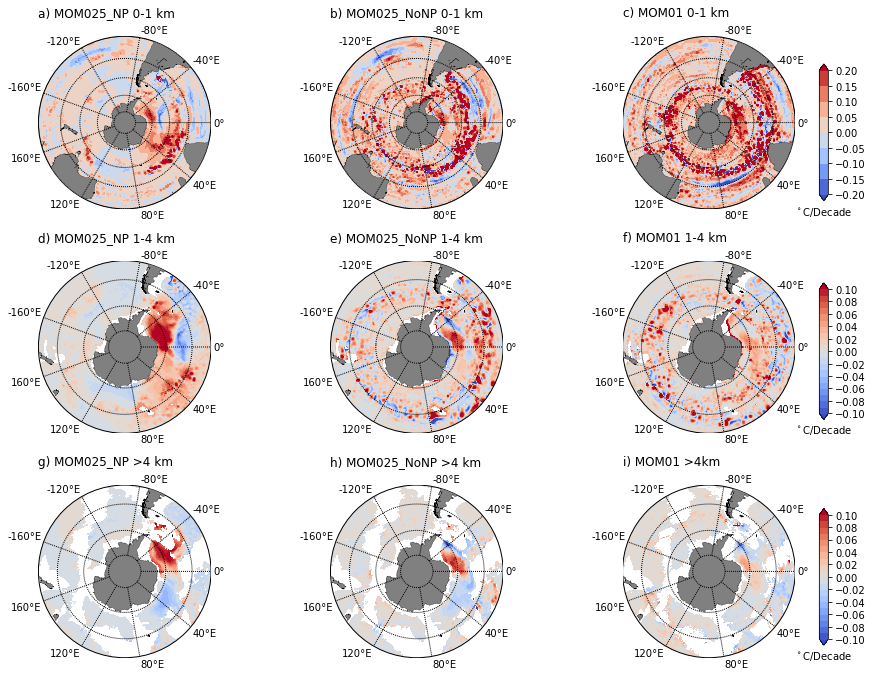

In [24]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

#clev = np.arange(-.15,.35,.05)
clev = np.arange(-0.2,.25,.05)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .35/(.35 + .15)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shrunk')#name='shifted'
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(3,3,1)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_0to1*10-np_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('a) MOM025_NP 0-1 km ',pad=20,loc='left')

plt.subplot(3,3,2)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_0to1*10-nonp_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('b) MOM025_NoNP 0-1 km',pad=20,loc='left')


plt.subplot(3,3,3)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_0to1*10-mom01_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('c) MOM01 0-1 km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.7,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')

#clev = np.arange(-.05,.15,.01)
clev = np.arange(-.1,.11,.01)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .15/(.15 + .05)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap= matplotlib.cm.coolwarm

plt.subplot(3,3,4)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_1to4*10-np_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('d) MOM025_NP 1-4 km ',pad=20,loc='left')

plt.subplot(3,3,5)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_1to4*10-nonp_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('e) MOM025_NoNP 1-4 km',pad=20,loc='left')


plt.subplot(3,3,6)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_1to4*10-mom01_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('f) MOM01 1-4 km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.38,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,ticks=np.arange(-.1,.12,.02),orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')

clev = np.arange(-.1,.11,.01)
#clev = np.arange(-.05,.15,.01)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .15/(.15 + .05)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(3,3,7)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_4to6*10-np_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('g) MOM025_NP >4 km ',pad=20,loc='left')

plt.subplot(3,3,8)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_4to6*10-nonp_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('h) MOM025_NoNP >4 km',pad=20,loc='left')


plt.subplot(3,3,9)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_4to6*10-mom01_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('i) MOM01 >4km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.05,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,ticks=np.arange(-.1,.12,.02),orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')


plt.tight_layout()

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig_TTrend_v2.png'
plt.savefig(of,dpi=220)